In [2]:
import numpy as np
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# load training and test data
X_train = sparse.load_npz('preprocessed_train_data.npz')
X_test = sparse.load_npz('preprocessed_test_data.npz')
y_train = np.loadtxt('train_labels.csv', delimiter=",")
y_test = np.loadtxt('test_labels.csv', delimiter=",")

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (81412, 2434)
Shape of X_test: (20354, 2434)
Shape of y_train: (81412,)
Shape of y_test: (20354,)


In [3]:
#random forest
model = RandomForestClassifier(random_state=42)

# fit the model on training
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [4]:
# evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[7947 3005]
 [4052 5350]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69     10952
         1.0       0.64      0.57      0.60      9402

    accuracy                           0.65     20354
   macro avg       0.65      0.65      0.65     20354
weighted avg       0.65      0.65      0.65     20354


Accuracy Score:
0.6532868232288493


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

#predict on the test data
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting- confusion matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nGradient Boosting - classification report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting - accuracy score:")
print(accuracy_score(y_test, y_pred_gb))


Gradient Boosting- confusion matrix:
[[7957 2995]
 [3911 5491]]

Gradient Boosting - classification report:
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70     10952
         1.0       0.65      0.58      0.61      9402

    accuracy                           0.66     20354
   macro avg       0.66      0.66      0.66     20354
weighted avg       0.66      0.66      0.66     20354


Gradient Boosting - accuracy score:
0.6607055124299892


In [6]:
# smaller parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

# initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  30.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  34.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.4s


In [9]:
#\parameter for random forest
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# initialize the RandomizedSearchCV 
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, cv=2, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# fit the random search to the data
random_search.fit(X_train, y_train)

#best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 6.5min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.6min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 6.6min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.1min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total 

Cross-validation scores: [0.66369834 0.66584782 0.65913278 0.65741309 0.65630758]
Mean cross-validation score: 0.660479922047016
ROC-AUC score: 0.7164944312704709


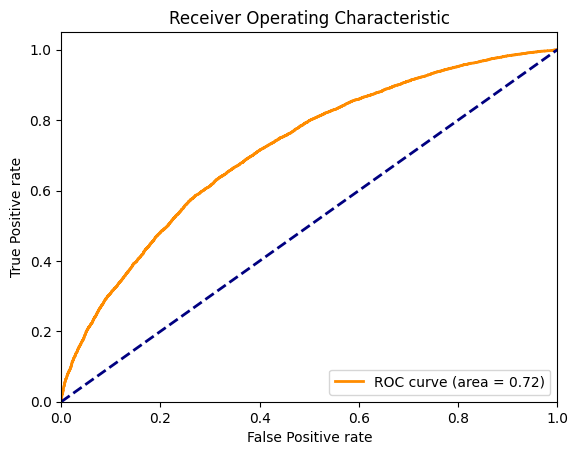

In [7]:
# cross validation 
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# ROC-AUC score
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC score:", roc_auc)

# plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [53]:
import joblib

# Save the trained model
joblib.dump(best_model, 'model.pkl')

['model.pkl']